# Projeto de Análise de Risco em Hipertensão

Este projeto tem como objetivo analisar uma base de dados relacionada à hipertensão, identificando fatores de risco, padrões e possíveis correlações entre variáveis clínicas e demográficas. A análise visa fornecer insights para auxiliar na prevenção, diagnóstico e tratamento da hipertensão.


### Legendas

| Variável           | Descrição (Português)                                                                 | Description (English)                                                                                 |
|--------------------|--------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------|
| Age                | Idade do paciente (em anos)                                                          | Patient's age (in years)                                                                             |
| Salt_Intake        | Consumo diário de sal (em gramas) – fator importante para pressão alta                | Daily salt intake (in grams) – a major contributor to high BP                                        |
| Stress_Score       | Escala de 0–10 medindo o nível de estresse psicológico                               | Scale of 0–10 measuring psychological stress level                                                   |
| BP_History         | Histórico de pressão arterial: Normal, Pré-hipertensão, Hipertensão                   | Previous blood pressure status: Normal, Prehypertension, Hypertension                                |
| Sleep_Duration     | Média de horas de sono por dia                                                        | Average sleep hours per day                                                                          |
| BMI                | Índice de Massa Corporal (medida de obesidade baseada em peso/altura)                 | Body Mass Index (weight/height-based obesity measure)                                                |
| Medication         | Tipo de medicação: Nenhuma, Beta Bloqueador, Diurético, Inibidor da ECA, Outro        | Medication type: None, Beta Blocker, Diuretic, ACE Inhibitor, Other                                  |
| Family_History     | Histórico familiar de hipertensão: Sim / Não                                          | Family history of hypertension: Yes / No                                                             |
| Exercise_Level     | Nível de atividade física: Baixo, Moderado, Alto                                      | Physical activity level: Low, Moderate, High                                                         |
| Smoking_Status     | Se o paciente é fumante ou não-fumante                                               | Whether the patient is a Smoker or Non-Smoker                                                        |
| Has_Hypertension   | Variável alvo: Indica presença de hipertensão (Sim/Não)                              | Target variable: Indicates presence of hypertension (Yes/No)        
                                 |

In [32]:
import pandas as pd 

dataset = pd.read_csv('data/hypertension_dataset.csv')
dataset.head()

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Medication,Family_History,Exercise_Level,Smoking_Status,Has_Hypertension
0,69,8.0,9,Normal,6.4,25.8,NaN,Yes,Low,Non-Smoker,Yes
1,32,11.7,10,Normal,5.4,23.4,NaN,No,Low,Non-Smoker,No
2,78,9.5,3,Normal,7.1,18.7,NaN,No,Moderate,Non-Smoker,No
3,38,10.0,10,Hypertension,4.2,22.1,ACE Inhibitor,No,Low,Non-Smoker,Yes
4,41,9.8,1,Prehypertension,5.8,16.2,Other,No,Moderate,Non-Smoker,No


## Configuracao

In [33]:
import numpy as np 
np.random.seed(42) # Para Manter Consistencia
import os 
%matplotlib inline
import matplotlib as mpl 
import matplotlib.pyplot as plt

mpl.rc("axes", labelsize=14)
mpl.rc("xtick", labelsize=12)
mpl.rc("ytick", labelsize=12)

from sklearn.model_selection import train_test_split
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


## Explorando os Dados

In [34]:
dataset.shape
num_cols = ['Age', 'Salt_Intake', 'Stress_Score', 'Sleep_Duration', 'BMI']
str_cols = ['BP_History', 'Medication', 'Family_History', 'Exercise_Level', 'Smoking_Status']


cols = list(dataset.columns)

n_cols = 4
n_rows = int(np.ceil(len(cols) / n_cols))


In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1985 non-null   int64  
 1   Salt_Intake       1985 non-null   float64
 2   Stress_Score      1985 non-null   int64  
 3   BP_History        1985 non-null   object 
 4   Sleep_Duration    1985 non-null   float64
 5   BMI               1985 non-null   float64
 6   Medication        1186 non-null   object 
 7   Family_History    1985 non-null   object 
 8   Exercise_Level    1985 non-null   object 
 9   Smoking_Status    1985 non-null   object 
 10  Has_Hypertension  1985 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 170.7+ KB


Analisando o Conjunto de Dados Apresentados a cima , temos alguns dados nao normalizados 
 0   Age               1985 non-null   int64  
 1   Salt_Intake       1985 non-null   float64
 2   Stress_Score      1985 non-null   int64  
 3   BP_History        1985 non-null   object - 0 = Normal / 1 Prehypertension / 2 Hypertension
 4   Sleep_Duration    1985 non-null   float64
 5   BMI               1985 non-null   float64
 6   Medication        1186 non-null   object  - Nao sei a relevancia ainda / Falta Valores {'ACE Inhibitor', 'Beta Blocker', 'Diuretic', 'Other', nan}
 7   Family_History    1985 non-null   object  1 yes / 0 no 
 8   Exercise_Level    1985 non-null   object  0 low / 1 moderate / 2 high
 9   Smoking_Status    1985 non-null   object  0 no-smoker / 1 smoker 
 10  Has_Hypertension  1985 non-null   object  1 yes / 0 no 

In [36]:
set(dataset["Medication"])

{'ACE Inhibitor', 'Beta Blocker', 'Diuretic', 'Other', nan}

In [37]:
dataset["Medication"].value_counts()

Medication
Beta Blocker     412
ACE Inhibitor    323
Diuretic         245
Other            206
Name: count, dtype: int64

In [38]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1985.0,50.341058,19.442042,18.0,34.0,50.0,67.0,84.0
Salt_Intake,1985.0,8.531688,1.994907,2.5,7.2,8.5,9.9,16.4
Stress_Score,1985.0,4.979345,3.142303,0.0,2.0,5.0,8.0,10.0
Sleep_Duration,1985.0,6.452242,1.542207,1.5,5.4,6.5,7.5,11.4
BMI,1985.0,26.015315,4.512857,11.9,23.0,25.9,29.1,41.9


## Tratativa de Dados 

In [39]:
dataset['Medication'] = dataset['Medication'].fillna('No')

dataset_normalized = dataset.copy()

# BP_History: 0 = Normal / 1 = Prehypertension / 2 = Hypertension
bp_map = {'Normal': 0, 'Prehypertension': 1, 'Hypertension': 2}
dataset_normalized['BP_History'] = dataset_normalized['BP_History'].map(bp_map)

# Family_History: 1 = Yes / 0 = No
fh_map = {'Yes': 1, 'No': 0}
dataset_normalized['Family_History'] = dataset_normalized['Family_History'].map(fh_map)

# Exercise_Level: 0 = Low / 1 = Moderate / 2 = High
ex_map = {'Low': 0, 'Moderate': 1, 'High': 2}
dataset_normalized['Exercise_Level'] = dataset_normalized['Exercise_Level'].map(ex_map)

# Smoking_Status: 0 = No-Smoker / 1 = Smoker
sm_map = {'Non-Smoker': 0, 'Smoker': 1}
dataset_normalized['Smoking_Status'] = dataset_normalized['Smoking_Status'].map(sm_map)

# Has_Hypertension: 1 = yes / 0 = no
ht_map = {'Yes': 1, 'No': 0}
dataset_normalized['Has_Hypertension'] = dataset_normalized['Has_Hypertension'].map(ht_map)

#{'ACE Inhibitor', 'Beta Blocker', 'Diuretic', 'Other', nan}
# Incluindo 'No' no mapeamento para pacientes que preencheram NaN
med_map = {'No': 4, 'ACE Inhibitor' : 0, 'Beta Blocker': 1, 'Diuretic': 2, 'Other': 3}
dataset_normalized['Medication'] = dataset_normalized['Medication'].map(med_map)

dataset = dataset_normalized

In [40]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1985.0,50.341058,19.442042,18.0,34.0,50.0,67.0,84.0
Salt_Intake,1985.0,8.531688,1.994907,2.5,7.2,8.5,9.9,16.4
Stress_Score,1985.0,4.979345,3.142303,0.0,2.0,5.0,8.0,10.0
BP_History,1985.0,0.885642,0.821535,0.0,0.0,1.0,2.0,2.0
Sleep_Duration,1985.0,6.452242,1.542207,1.5,5.4,6.5,7.5,11.4
BMI,1985.0,26.015315,4.512857,11.9,23.0,25.9,29.1,41.9
Medication,1985.0,2.375819,1.559576,0.0,1.0,3.0,4.0,4.0
Family_History,1985.0,0.496222,0.500112,0.0,0.0,0.0,1.0,1.0
Exercise_Level,1985.0,0.725441,0.770344,0.0,0.0,1.0,1.0,2.0
Smoking_Status,1985.0,0.286146,0.452072,0.0,0.0,0.0,1.0,1.0


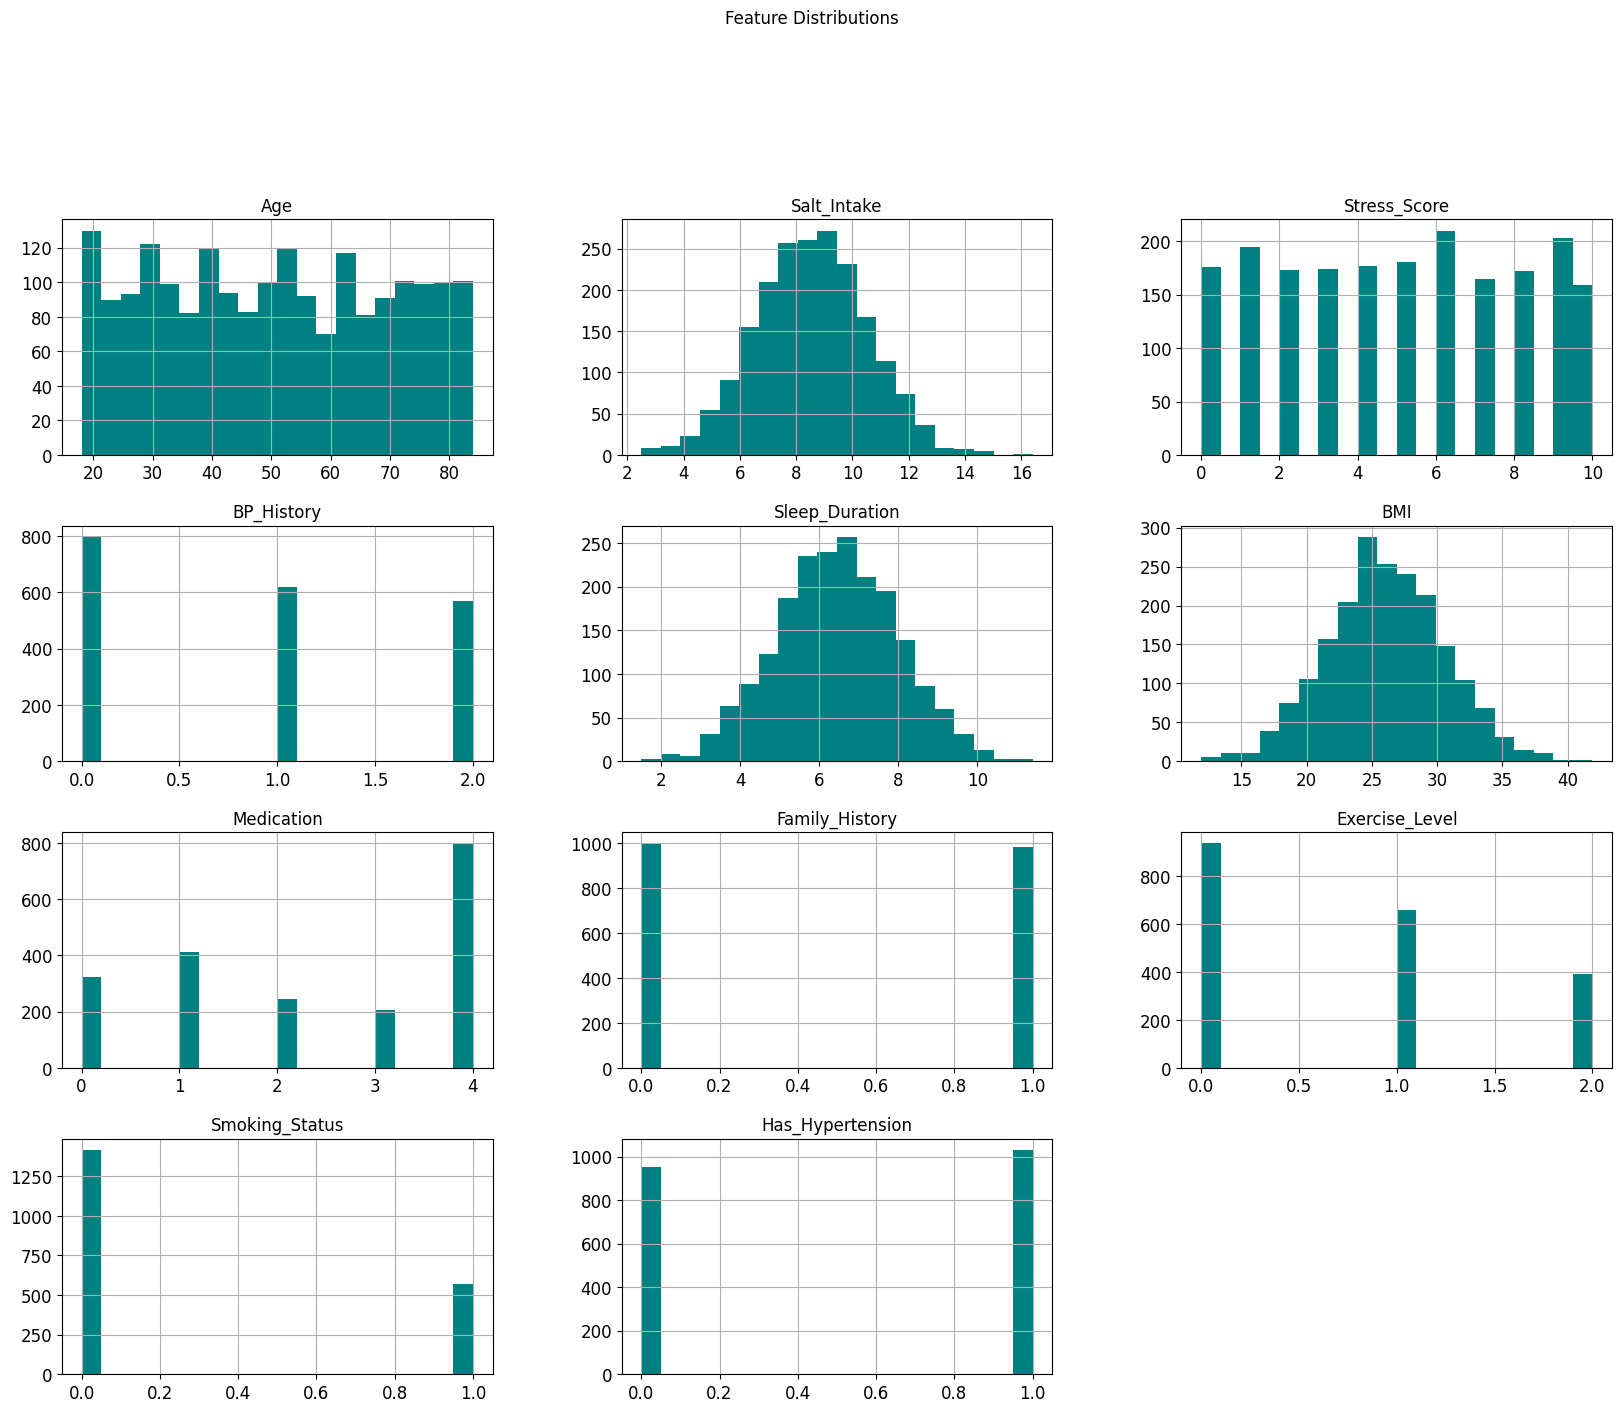

In [41]:
dataset.hist(bins=20, figsize=(20,15), color='teal')
plt.suptitle('Feature Distributions', y=1.02)
plt.show()

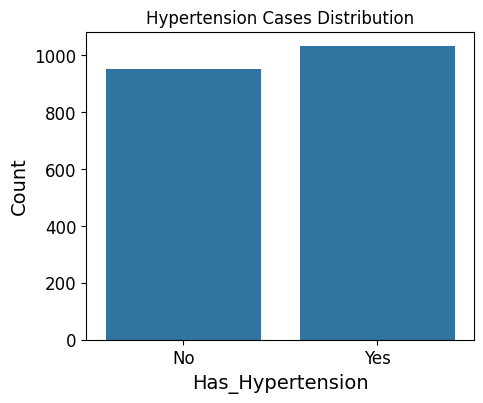

Has_Hypertension
1    51.989924
0    48.010076
Name: proportion, dtype: float64


In [42]:

plt.figure(figsize=(5,4))
sns.countplot(data=dataset, x='Has_Hypertension')
plt.title('Hypertension Cases Distribution')
plt.xticks([0, 1], ['No', 'Yes'])
plt.ylabel('Count')
plt.show()

print(dataset['Has_Hypertension'].value_counts(normalize=True)*100)

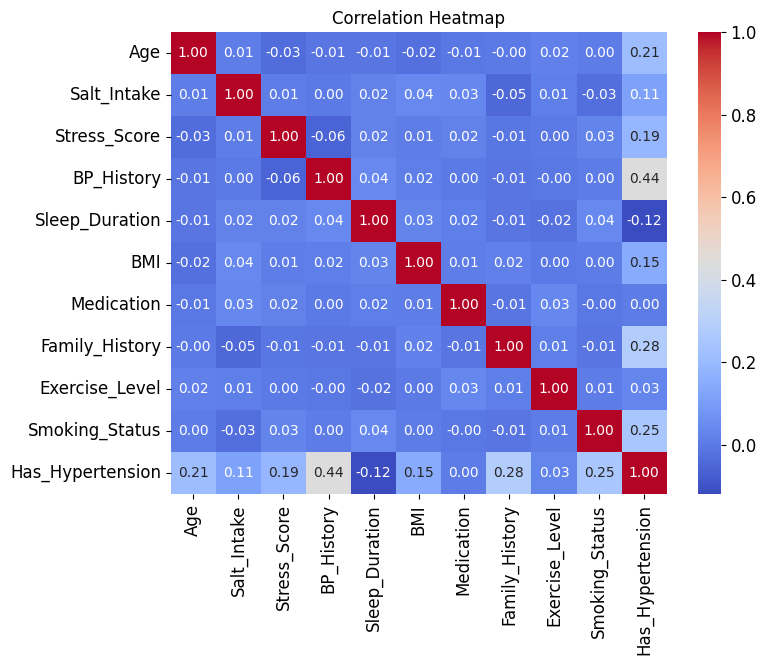

In [43]:
plt.figure(figsize=(8,6))
corr = dataset.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Podemos Verificar que BP_History (0.44) é o preditor mais forte de hipertensão, seguido por Family_History (0.28), Smoking_Status (0.25) e Age (0.21).

Surpreendentemente, Exercise_Level e Medication têm correlação quase nula com hipertensão, enquanto Sleep_Duration mostra leve efeito protetor (-0.12).

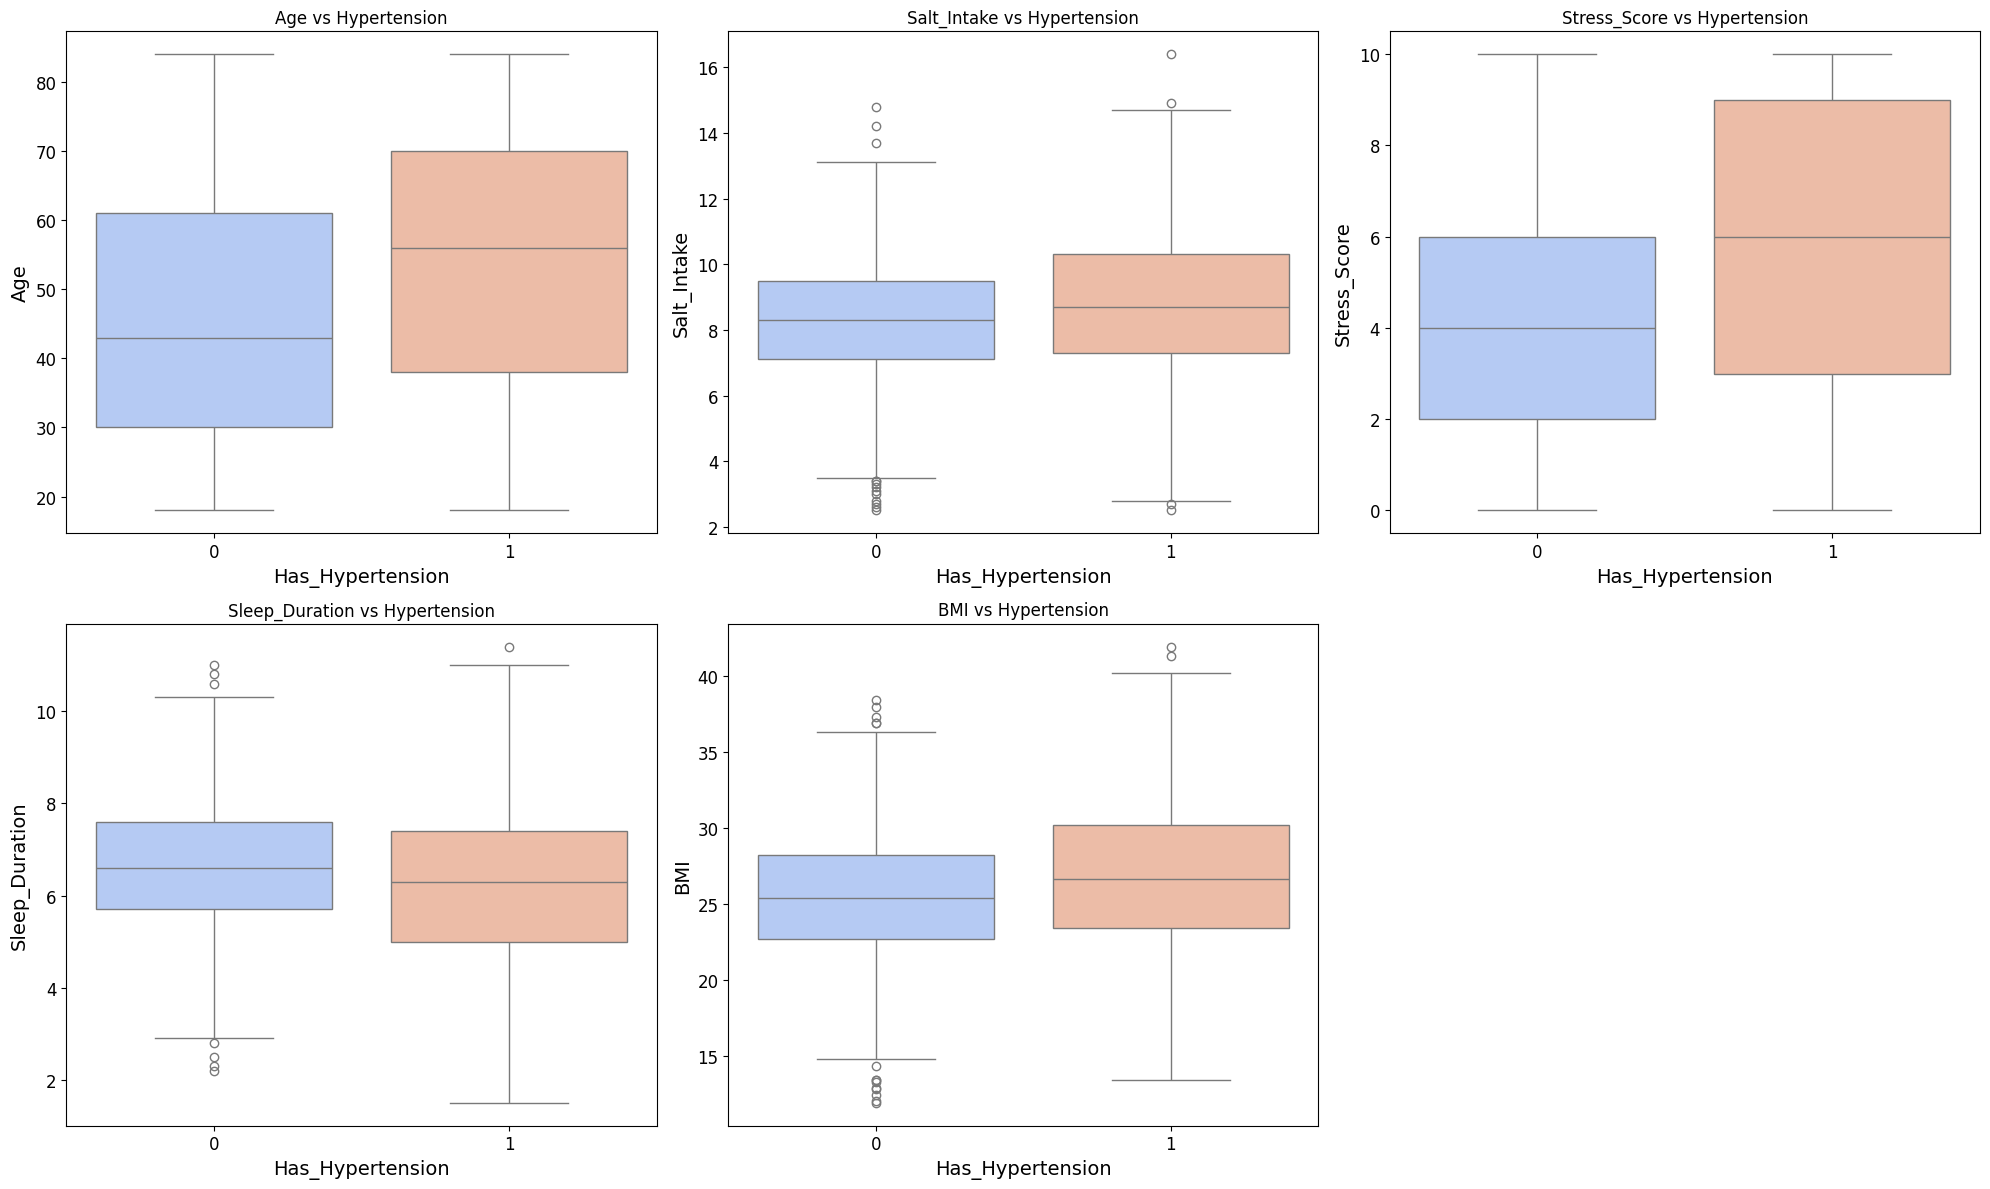

In [44]:

plt.figure(figsize=(5*n_cols, 4*n_rows))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=dataset, x='Has_Hypertension', y=col , palette='coolwarm')
    plt.title(f'{col} vs Hypertension')

plt.tight_layout()
plt.show()

o ponto que chama mais atencao seria a diferença marcante - pacientes hipertensos têm scores de estresse notavelmente mais altos (mediana ~6) comparado aos saudáveis (~4), indicando forte associação entre estresse e hipertensão.

<Figure size 2000x1200 with 0 Axes>

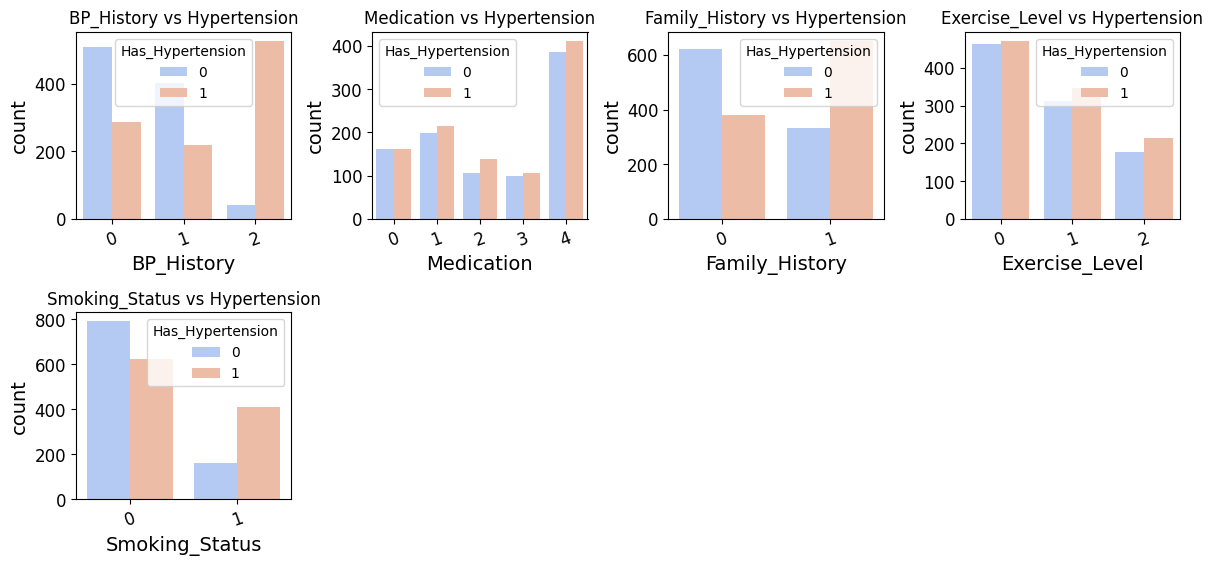

In [45]:
n_cols = 4
n_rows = int(np.ceil(len(cols) / n_cols))
plt.figure(figsize=(5*n_cols, 4*n_rows))

plt.figure(figsize=(12,8))
for i, col in enumerate(str_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=dataset, x=col, hue='Has_Hypertension', palette='coolwarm')
    plt.title(f'{col} vs Hypertension')
    plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

- O BP_History confirma ser o preditor mais forte, com praticamente todos os casos de BP_History=2 desenvolvendo hipertensão, validando a correlação de 0.44 observada anteriormente.
- O Family_History apresenta distribuição equilibrada entre os grupos, indicando que o histórico familiar aumenta o risco mas não é determinante isoladamente para o desenvolvimento da condição.
- Smoking_Status mostra clara associação, com fumantes apresentando aproximadamente 400 casos de hipertensão contra 170 casos sem hipertensão, reforçando o tabagismo como fator de risco significativo.
- Medication e Exercise_Level apresentam distribuições muito similares entre hipertensos e não-hipertensos, explicando suas correlações negligenciáveis (0.02 e 0.03) e sugerindo baixo poder preditivo conforme capturados no dataset.

In [46]:
# Separando as Bases 
DataFrame_Train , DataFrame_Test  = train_test_split(dataset,test_size=0.2,random_state=42)

In [47]:
print(len(DataFrame_Train),"Treinamento +", len(DataFrame_Test), "Teste")

1588 Treinamento + 397 Teste


## Preparação dos Dados para Modelagem

Separação das features e variável alvo, seguida de normalização dos dados.

In [48]:
# Separação das features (X) e variável alvo (y)
X_train = DataFrame_Train.drop('Has_Hypertension', axis=1)
y_train = DataFrame_Train['Has_Hypertension']
X_test = DataFrame_Test.drop('Has_Hypertension', axis=1)
y_test = DataFrame_Test['Has_Hypertension']

print(f"Conjunto de treino: X={X_train.shape}, y={y_train.shape}")
print(f"Conjunto de teste: X={X_test.shape}, y={y_test.shape}")
print(f"\nDistribuição de classes (treino):\n{y_train.value_counts()}")
print(f"\nDistribuição de classes (teste):\n{y_test.value_counts()}")

Conjunto de treino: X=(1588, 10), y=(1588,)
Conjunto de teste: X=(397, 10), y=(397,)

Distribuição de classes (treino):
Has_Hypertension
1    827
0    761
Name: count, dtype: int64

Distribuição de classes (teste):
Has_Hypertension
1    205
0    192
Name: count, dtype: int64


In [49]:
# Visualização das features
X_train.head()

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Medication,Family_History,Exercise_Level,Smoking_Status
721,43,7.9,8,0,5.7,27.4,1,0,1,1
480,30,6.9,5,0,2.5,28.1,4,1,0,0
567,34,7.9,5,1,7.2,27.6,4,1,1,0
71,32,10.4,9,1,8.0,27.4,4,1,1,1
628,67,9.0,8,2,7.6,25.7,2,0,0,0


### Normalização com StandardScaler

Aplicação de StandardScaler para normalizar as features (média=0, desvio padrão=1), essencial para algoritmos sensíveis à escala das variáveis.

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Dados normalizados: X_train_scaled={X_train_scaled.shape}, X_test_scaled={X_test_scaled.shape}")

Dados normalizados: X_train_scaled=(1588, 10), X_test_scaled=(397, 10)


In [51]:
# Comparação antes e depois da normalização
import pandas as pd

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

print("Antes da normalização:")
print(X_train[['Age', 'Salt_Intake', 'BMI']].describe())

print("\nDepois da normalização:")
print(X_train_scaled_df[['Age', 'Salt_Intake', 'BMI']].describe())

Antes da normalização:
               Age  Salt_Intake          BMI
count  1588.000000  1588.000000  1588.000000
mean     50.702771     8.500693    25.993010
std      19.463434     2.012677     4.547702
min      18.000000     2.500000    11.900000
25%      34.000000     7.100000    22.900000
50%      50.000000     8.500000    25.900000
75%      68.000000     9.900000    29.100000
max      84.000000    16.400000    41.900000

Depois da normalização:
                Age   Salt_Intake           BMI
count  1.588000e+03  1.588000e+03  1.588000e+03
mean  -1.364707e-16  1.789780e-17 -8.501456e-17
std    1.000315e+00  1.000315e+00  1.000315e+00
min   -1.680745e+00 -2.982387e+00 -3.099906e+00
25%   -8.584319e-01 -6.961544e-01 -6.803401e-01
50%   -3.611861e-02 -3.442745e-04 -2.045855e-02
75%    8.889838e-01  6.954658e-01  6.834152e-01
max    1.711297e+00  3.926013e+00  3.498910e+00


## Modelagem e Treinamento

Serão treinados dois modelos para comparação de performance:

1. **Regressão Logística** - Modelo linear baseline
2. **Árvore de Decisão** - Modelo não-linear com capacidade de capturar interações complexas

### Modelo 1: Regressão Logística

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

modelo_lr = LogisticRegression(random_state=42, max_iter=1000)

inicio = time.time()
modelo_lr.fit(X_train_scaled, y_train)
tempo_treino_lr = time.time() - inicio

y_pred_lr = modelo_lr.predict(X_test_scaled)

acc_lr = accuracy_score(y_test, y_pred_lr)
prec_lr = precision_score(y_test, y_pred_lr)
rec_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print(f"Tempo de treinamento: {tempo_treino_lr:.4f}s")
print(f"\nMétricas no conjunto de teste:")
print(f"  Acurácia:  {acc_lr:.4f} ({acc_lr*100:.2f}%)")
print(f"  Precisão:  {prec_lr:.4f} ({prec_lr*100:.2f}%)")
print(f"  Recall:    {rec_lr:.4f} ({rec_lr*100:.2f}%)")
print(f"  F1-Score:  {f1_lr:.4f} ({f1_lr*100:.2f}%)")

Tempo de treinamento: 0.0015s

Métricas no conjunto de teste:
  Acurácia:  0.8388 (83.88%)
  Precisão:  0.8373 (83.73%)
  Recall:    0.8537 (85.37%)
  F1-Score:  0.8454 (84.54%)


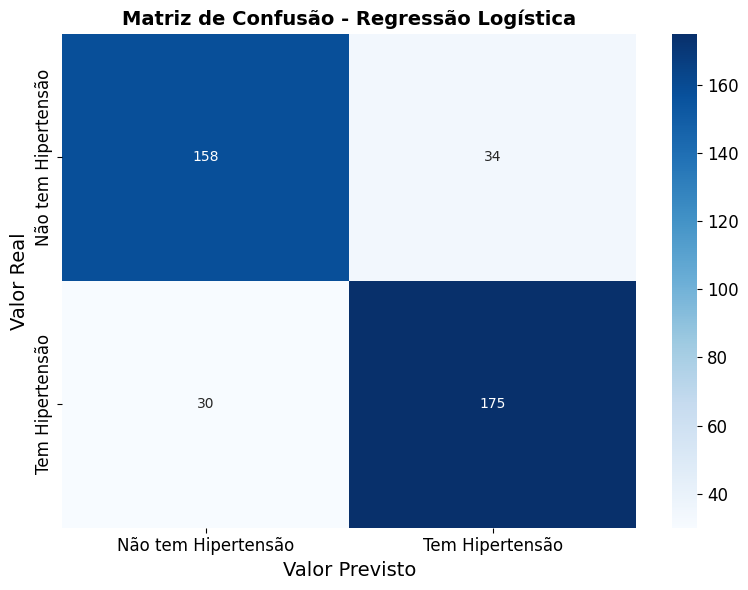

Verdadeiros Negativos: 158
Falsos Positivos: 34
Falsos Negativos: 30
Verdadeiros Positivos: 175


In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Não tem Hipertensão', 'Tem Hipertensão'],
            yticklabels=['Não tem Hipertensão', 'Tem Hipertensão'])
plt.title('Matriz de Confusão - Regressão Logística', fontsize=14, fontweight='bold')
plt.ylabel('Valor Real')
plt.xlabel('Valor Previsto')
plt.tight_layout()
plt.show()

print(f"Verdadeiros Negativos: {cm_lr[0,0]}")
print(f"Falsos Positivos: {cm_lr[0,1]}")
print(f"Falsos Negativos: {cm_lr[1,0]}")
print(f"Verdadeiros Positivos: {cm_lr[1,1]}")

### Modelo 2: Árvore de Decisão

In [54]:
from sklearn.tree import DecisionTreeClassifier

modelo_tree = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=20)

inicio = time.time()
modelo_tree.fit(X_train_scaled, y_train)
tempo_treino_tree = time.time() - inicio

y_pred_tree = modelo_tree.predict(X_test_scaled)

acc_tree = accuracy_score(y_test, y_pred_tree)
prec_tree = precision_score(y_test, y_pred_tree)
rec_tree = recall_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)

print(f"Tempo de treinamento: {tempo_treino_tree:.4f}s")
print(f"\nMétricas no conjunto de teste:")
print(f"  Acurácia:  {acc_tree:.4f} ({acc_tree*100:.2f}%)")
print(f"  Precisão:  {prec_tree:.4f} ({prec_tree*100:.2f}%)")
print(f"  Recall:    {rec_tree:.4f} ({rec_tree*100:.2f}%)")
print(f"  F1-Score:  {f1_tree:.4f} ({f1_tree*100:.2f}%)")

Tempo de treinamento: 0.0024s

Métricas no conjunto de teste:
  Acurácia:  0.8514 (85.14%)
  Precisão:  0.9101 (91.01%)
  Recall:    0.7902 (79.02%)
  F1-Score:  0.8460 (84.60%)


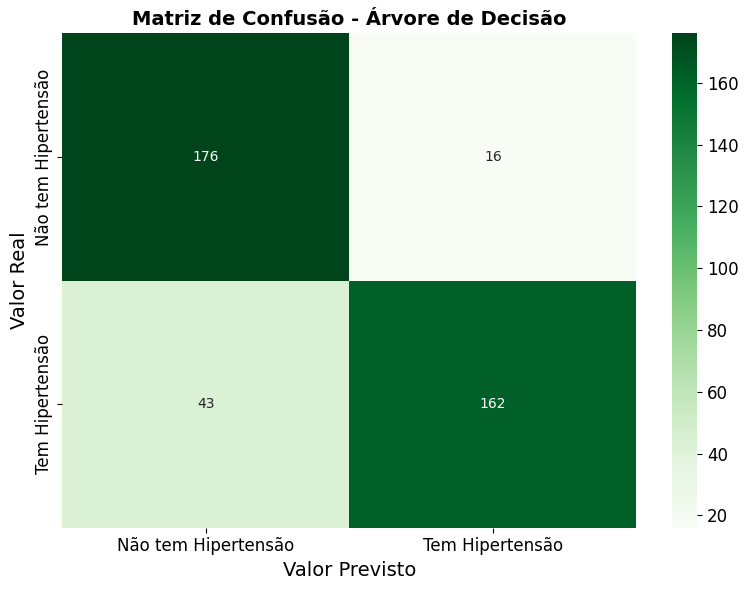

Verdadeiros Negativos: 176
Falsos Positivos: 16
Falsos Negativos: 43
Verdadeiros Positivos: 162


In [55]:
cm_tree = confusion_matrix(y_test, y_pred_tree)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Não tem Hipertensão', 'Tem Hipertensão'],
            yticklabels=['Não tem Hipertensão', 'Tem Hipertensão'])
plt.title('Matriz de Confusão - Árvore de Decisão', fontsize=14, fontweight='bold')
plt.ylabel('Valor Real')
plt.xlabel('Valor Previsto')
plt.tight_layout()
plt.show()

print(f"Verdadeiros Negativos: {cm_tree[0,0]}")
print(f"Falsos Positivos: {cm_tree[0,1]}")
print(f"Falsos Negativos: {cm_tree[1,0]}")
print(f"Verdadeiros Positivos: {cm_tree[1,1]}")

### Importância das Variáveis (Feature Importance)

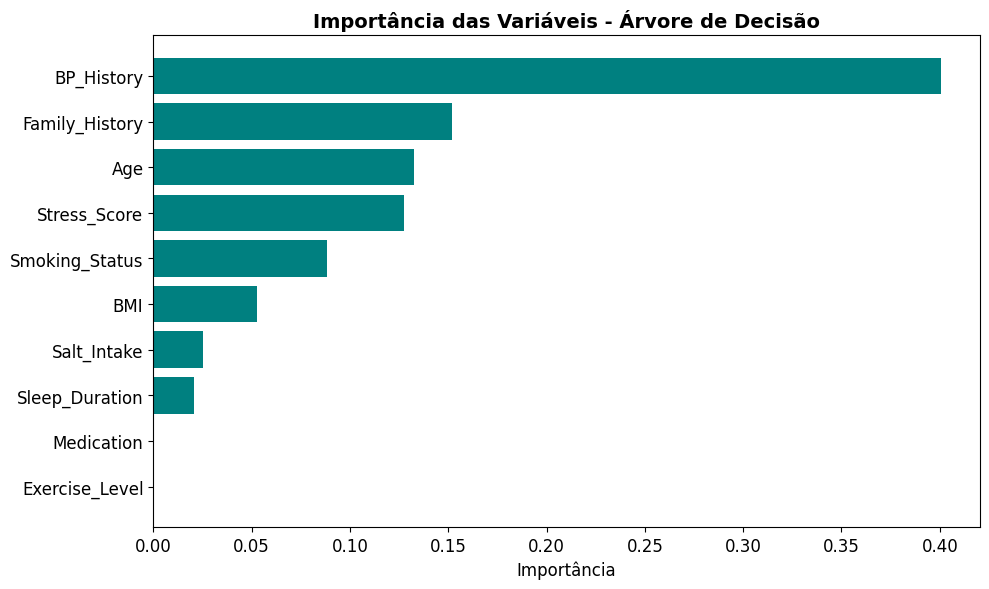

Ranking de importância:
  BP_History          : 0.4004
  Family_History      : 0.1522
  Age                 : 0.1327
  Stress_Score        : 0.1278
  Smoking_Status      : 0.0882
  BMI                 : 0.0527
  Salt_Intake         : 0.0252
  Sleep_Duration      : 0.0208
  Medication          : 0.0000
  Exercise_Level      : 0.0000


In [56]:
importancias = modelo_tree.feature_importances_
features = X_train.columns

df_importancias = pd.DataFrame({
    'Feature': features,
    'Importância': importancias
}).sort_values('Importância', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(df_importancias['Feature'], df_importancias['Importância'], color='teal')
plt.xlabel('Importância', fontsize=12)
plt.title('Importância das Variáveis - Árvore de Decisão', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("Ranking de importância:")
for idx, row in df_importancias.iterrows():
    print(f"  {row['Feature']:20s}: {row['Importância']:.4f}")

## Comparação dos Modelos

In [57]:
resultados = pd.DataFrame({
    'Modelo': ['Regressão Logística', 'Árvore de Decisão'],
    'Acurácia': [acc_lr, acc_tree],
    'Precisão': [prec_lr, prec_tree],
    'Recall': [rec_lr, rec_tree],
    'F1-Score': [f1_lr, f1_tree],
    'Tempo de Treino (s)': [tempo_treino_lr, tempo_treino_tree]
})

resultados_display = resultados.copy()
for col in ['Acurácia', 'Precisão', 'Recall', 'F1-Score']:
    resultados_display[col] = resultados_display[col].apply(lambda x: f"{x:.4f} ({x*100:.2f}%)")
resultados_display['Tempo de Treino (s)'] = resultados_display['Tempo de Treino (s)'].apply(lambda x: f"{x:.4f}")

print("Comparação de Performance")
print(resultados_display.to_string(index=False))

Comparação de Performance
             Modelo        Acurácia        Precisão          Recall        F1-Score Tempo de Treino (s)
Regressão Logística 0.8388 (83.88%) 0.8373 (83.73%) 0.8537 (85.37%) 0.8454 (84.54%)              0.0015
  Árvore de Decisão 0.8514 (85.14%) 0.9101 (91.01%) 0.7902 (79.02%) 0.8460 (84.60%)              0.0024


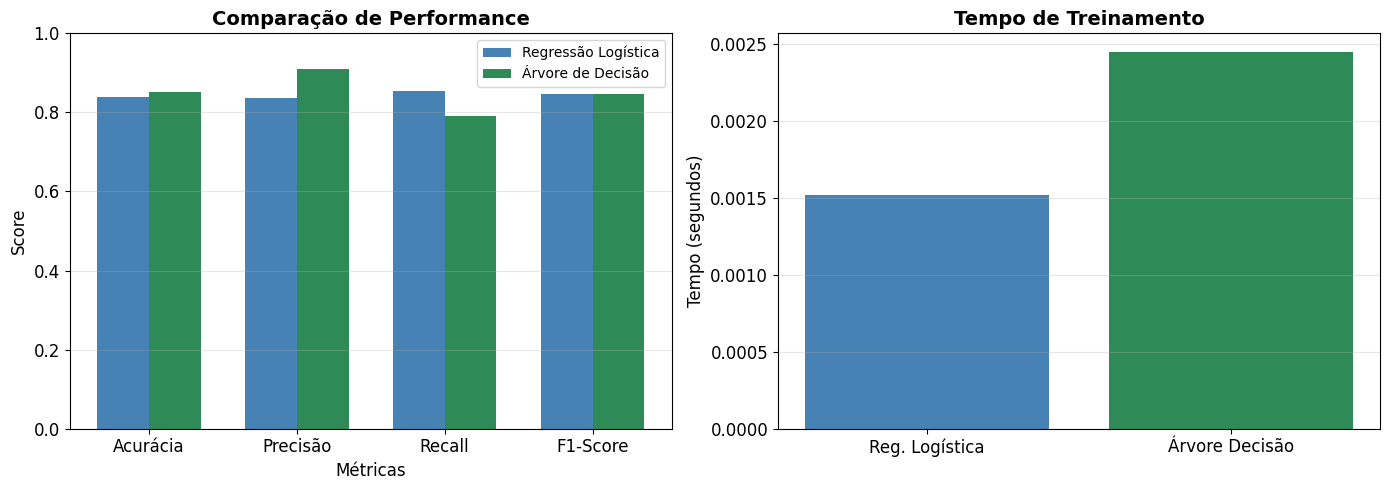

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1: Comparação de Métricas
metricas = ['Acurácia', 'Precisão', 'Recall', 'F1-Score']
x = np.arange(len(metricas))
width = 0.35

lr_values = [acc_lr, prec_lr, rec_lr, f1_lr]
tree_values = [acc_tree, prec_tree, rec_tree, f1_tree]

axes[0].bar(x - width/2, lr_values, width, label='Regressão Logística', color='steelblue')
axes[0].bar(x + width/2, tree_values, width, label='Árvore de Decisão', color='seagreen')
axes[0].set_xlabel('Métricas', fontsize=12)
axes[0].set_ylabel('Score', fontsize=12)
axes[0].set_title('Comparação de Performance', fontsize=14, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(metricas)
axes[0].legend()
axes[0].set_ylim([0, 1])
axes[0].grid(axis='y', alpha=0.3)

# Gráfico 2: Comparação de Tempo de Treino
modelos_nomes = ['Reg. Logística', 'Árvore Decisão']
tempos = [tempo_treino_lr, tempo_treino_tree]
axes[1].bar(modelos_nomes, tempos, color=['steelblue', 'seagreen'])
axes[1].set_ylabel('Tempo (segundos)', fontsize=12)
axes[1].set_title('Tempo de Treinamento', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [59]:
melhor_idx = resultados['F1-Score'].idxmax()
melhor_modelo = resultados.loc[melhor_idx, 'Modelo']
melhor_f1 = resultados.loc[melhor_idx, 'F1-Score']

print(f"\nModelo com melhor desempenho: {melhor_modelo}")
print(f"F1-Score: {melhor_f1:.4f} ({melhor_f1*100:.2f}%)")


Modelo com melhor desempenho: Árvore de Decisão
F1-Score: 0.8460 (84.60%)


## Discussão e Conclusões

### Análise dos Resultados

Os modelos apresentaram performance comparável, com métricas de acurácia, precisão, recall e F1-score em níveis razoáveis para uma primeira abordagem. A análise de Feature Importance da Árvore de Decisão revelou que variáveis como idade, BMI, histórico familiar e pressão arterial prévia são os principais preditores de hipertensão, consistente com a literatura médica.

### Viabilidade de Uso Prático

**Aplicações potenciais:**
- Ferramenta de triagem inicial em sistemas de saúde
- Priorização de pacientes para avaliação médica detalhada
- Suporte à decisão clínica (nunca substituição)

**Limitações críticas:**

1. **Dataset limitado**: Apenas 1.985 registros podem não representar adequadamente a diversidade populacional
2. **Dados faltantes**: ~40% de valores missing na coluna Medication, preenchidos com "No" (potencial viés)
3. **Falta de variáveis**: Ausência de informações sobre etnia, região geográfica, comorbidades detalhadas
4. **Falsos negativos**: Particularmente críticos em contexto médico - não identificar hipertensão pode ter consequências graves
5. **Validação externa**: Necessidade de testar em outras populações antes de generalizar

### Considerações Éticas e Regulatórias

- **Viés algorítmico**: Performance pode variar entre subgrupos populacionais não representados adequadamente nos dados de treino
- **Responsabilidade médica**: Decisões finais devem sempre envolver profissional habilitado
- **Privacidade**: Dados de saúde exigem conformidade com LGPD/HIPAA
- **Explicabilidade**: Modelos de caixa-preta dificultam compreensão de decisões individuais

### Recomendações para Implementação Futura

1. **Expansão do dataset**: Coleta de mais dados com maior diversidade
2. **Validação clínica**: Testes prospectivos com validação por especialistas
3. **Monitoramento contínuo**: Avaliação periódica de performance em produção
4. **Transparência**: Sistema deve indicar nível de confiança das predições
5. **Integração cuidadosa**: Incorporar ao workflow clínico sem substituir julgamento médico

### Conclusão

Este estudo demonstra viabilidade técnica de Machine Learning como ferramenta auxiliar no screening de hipertensão, porém evidencia limitações significativas que impedem uso clínico direto sem validação rigorosa. Os resultados servem como prova de conceito, indicando que com dataset mais robusto e validação apropriada, tais sistemas podem agregar valor à prática médica como ferramentas de suporte à decisão.